<a href="https://colab.research.google.com/github/EmeryWong98/Ever-Up/blob/main/Python/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(48222, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Data Cleaning

In [6]:
df.isnull().sum(axis = 0)

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [7]:
ny_df = df[df['state']=='New York']

In [8]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [9]:
ny_df.shape

(873, 5)

In [10]:
ny_df.tail()

,date,state,fips,cases,deaths
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268
48088,2022-07-19,New York,36,5727636,69322
48144,2022-07-20,New York,36,5735607,69352
48200,2022-07-21,New York,36,5744579,69369


In [11]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [12]:
#total number of cases
ny_df['cases'].max()

5744579

In [13]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1927060916

Finding new covid 19 cases on daily basis (new cases added everyday)

In [14]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [15]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [17]:
ny_df['new_cases'].sum()

5744579

In [18]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [19]:
type(ny_new_cases)

pandas.core.series.Series

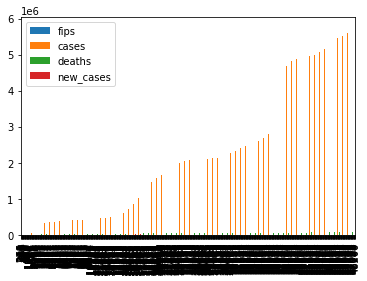

In [20]:
ny_df.plot(kind='bar')

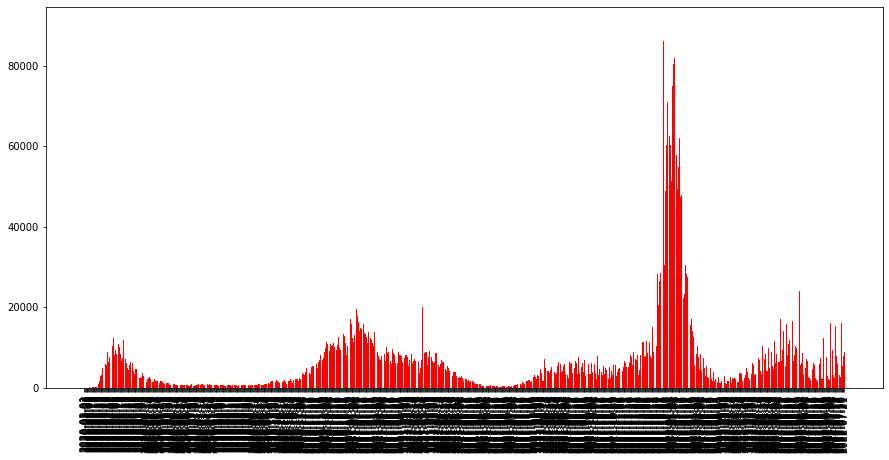

In [21]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [22]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [23]:
# ny_dates_30

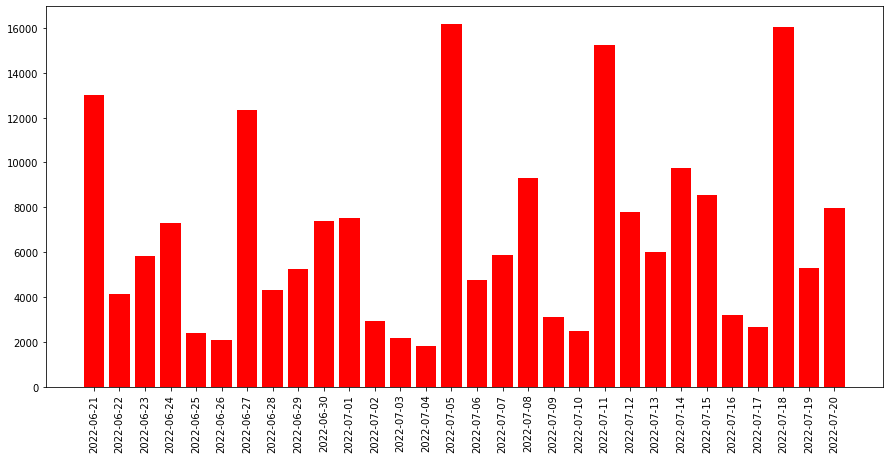

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

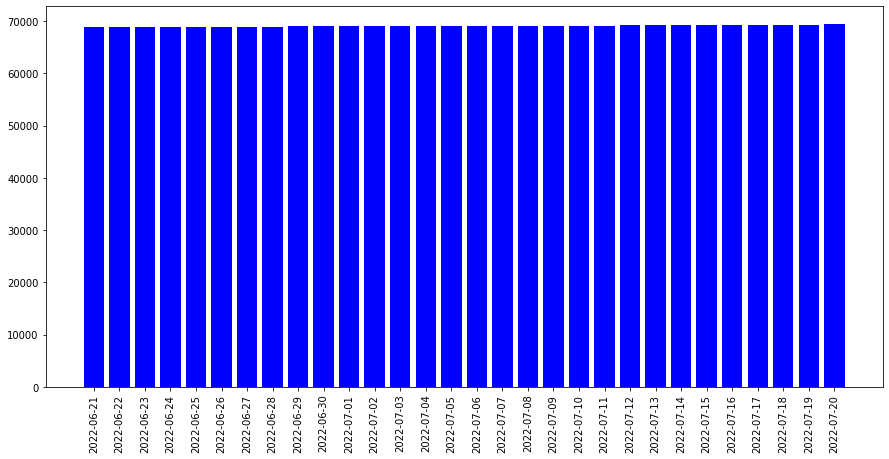

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [26]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

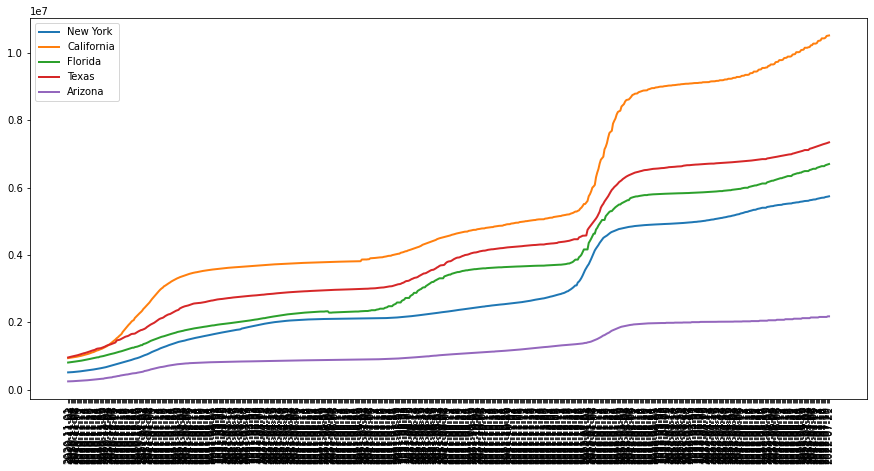

In [27]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --COVID-19 cases continue to increase across the United States. In the central areas, the increase was slower than in coastal areas, and the daily death remained relatively stable and high. Confirmed cases and deaths, which are widely considered to be an undercount of the true toll, are counts of individuals whose coronavirus infections were confirmed by a molecular laboratory test.  Probable cases and deaths count individuals who meet criteria for other types of testing, symptoms and exposure, as developed by national and local governments.
2.   Conclusion 2
     --There are cycles of fluctuations in COVID-19 infection, existing peaks and troughs. Governments often revise data or report a single-day large increase in cases or deaths from unspecified days without historical revisions, which can cause an irregular pattern in the daily reported figures. 

